# Project: Wrangling and Analyze Data

In [1]:
#import the needed packages 
import json
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import time 
import numpy as np
import re

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
#read WeRateDogs Twitter archive data into a variable 
dog_rate = pd.read_csv('twitter-archive-enhanced.csv')

#create a dataframe
dog_rate_df = pd.DataFrame(dog_rate)

#view the first five rows  of the dataset
dog_rate_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
#get tweet image prediction data from server 
image = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

# Save the dataset 
with open("image-predictions.tsv", mode='wb') as file:
    file.write(image.content)
    
##read image-predictions.tsv into a variable
image_predictions = pd.read_csv('image-predictions.tsv', sep = '\t')

#create a dataframe
image_predictions_df = pd.DataFrame(image_predictions)

#view the first five rows  of the dataset
image_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions

#auth = OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
#tweet_ids = df_1.tweet_id.values
#len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
#count = 0
#fails_dict = {}
#start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
#with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    #for tweet_id in tweet_ids:
     #   count += 1
      #  print(str(count) + ": " + str(tweet_id))
      #  try:
       #     tweet = api.get_status(tweet_id, tweet_mode='extended')
       #     print("Success")
        #    json.dump(tweet._json, outfile)
        #    outfile.write('\n')
        #except tweepy.TweepError as e:
         #   print("Fail")
         #   fails_dict[tweet_id] = e
         #   pass
#end = timer()
#print(end - start)
#print(fails_dict)

In [5]:
#create an empty list
df_txt_list = []

# read the dataset and read line by line 
with open('tweet-json.txt', 'r') as dog_tweet:
    for line in dog_tweet.readlines():
        dog_tweet_line = json.loads(line)
        
         # Get the needed columns 
        tweet_id = dog_tweet_line['id']
        retweet_counts = dog_tweet_line['retweet_count']
        favorites_counts = dog_tweet_line['favorite_count']
        
        #append the selected columns to the empty list 
        df_txt_list.append({'id' : tweet_id, 'retweet_count': retweet_counts, 'favorite_count' : favorites_counts})
        
#create a dataframe
tweet_json = pd.DataFrame(df_txt_list, columns = ['id', 'retweet_count', 'favorite_count'] )

#view the first five rows  of the dataset
tweet_json.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



# dog_rate Assessing

In [6]:
#view dog_rate dataset for visual assessing 
dog_rate

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [7]:
#Checking For null values
dog_rate_df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

__Observations:__

* The rows of retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp that have non-empty values needs to be removed, since retweets are duplicates of the actual tweets.

* The source contains html residues.

* The columns in_reply_to_status_id, in_reply_to_user_id that have non-empty values needs to be removed, since reply are duplicates of the tweets and are not needed for this analysis.

* The columns expanded_urls is not needed.

* The columns doggo, floofer, pupper and puppo should be a part of a single column.

* The name column contains multiple english words including None values that needs to be converted to Nan. 	

* The columns doggo, floofer, pupper and puppo contains None values that needs to be converted to Nan.


In [8]:
dog_rate.shape 

(2356, 17)

In [9]:
#Programmatic Assessment 
dog_rate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

__Observations:__

* The tweet_id column is integer and needs to be converted to string.

* The timestamp column is string needs to be converted to datetime datatype. 

In [10]:
#Programmatic Assessment of dog_rate
dog_rate_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1830,676219687039057920,NaN,NaN,2015-12-14 01:58:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kenneth. He's stuck in a bubble. 10/10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676219687...,10,10,Kenneth,None,None,None,None
1114,732732193018155009,NaN,NaN,2016-05-18 00:39:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ralpher. He's an East Guinean Flop Dog...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/732732193...,12,10,Ralpher,None,None,None,None
137,866094527597207552,NaN,NaN,2017-05-21 00:53:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Here's a pupper before and afte...,8.378202e+17,4.196984e+09,2017-03-04 00:21:08 +0000,https://twitter.com/dog_rates/status/837820167...,12,10,None,None,None,pupper,None
532,808001312164028416,NaN,NaN,2016-12-11 17:31:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cooper. He likes to stick his tongue o...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808001312...,12,10,Cooper,None,None,None,None
1619,684959798585110529,NaN,NaN,2016-01-07 04:48:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's a neat dog. No legs (tragi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684959798...,5,10,Jerry,None,None,None,None


In [11]:
#checking to make sure there are not cases where there are multiple dog stages in a row
dog_rate_df.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})

,doggo,floofer,pupper,puppo,count
0,None,None,None,None,1976
1,None,None,None,puppo,29
2,None,None,pupper,None,245
3,None,floofer,None,None,9
4,doggo,None,None,None,83
5,doggo,None,None,puppo,1
6,doggo,None,pupper,None,12
7,doggo,floofer,None,None,1


__Observation:__
*  There are cases where there are multiple dog stages in a row

In [12]:
#Checking For Duplicates 
dog_rate_df[dog_rate_df.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [13]:
# checking the incorrect dog names
mast = dog_rate_df.name.str.contains('^[a-z]', regex = True)
dog_rate_df[mast].name.value_counts().sort_index()

a               55
actually         2
all              1
an               7
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old              1
one              4
quite            4
space            1
such             1
the              8
this             1
unacceptable     1
very             5
Name: name, dtype: int64

These incorrect dog names needs to be converted to numpy nan

In [14]:
dog = dog_rate_df[dog_rate_df['rating_denominator'] != 10]
dog.index 

Int64Index([ 313,  342,  433,  516,  784,  902, 1068, 1120, 1165, 1202, 1228,
            1254, 1274, 1351, 1433, 1598, 1634, 1635, 1662, 1663, 1779, 1843,
            2335],
           dtype='int64')

In [15]:
for n in dog['text']:
    print(n)
    print('\n')
    

@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho


@docmisterio account started on 11/15/15


The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd


Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx


RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…


Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE


After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ


Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv


Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a


This is Bluebert. He just 

__Observations:__

 Here, where the ratings are not following the standards:

1) It is done delibarately and is not an extraction problem.

2) During extraction, only the first part of the fraction in the text is chosen.

`Note`: Upon closer observations, only 5 denominator was invalid the other was done deliberately 

* The invalid ratings denominator needs to be updated

In [16]:
# Locating the entries with Numerator containing Decimal Values

for row in dog_rate_df['text']:
    detect = '(\d+\.\d+)\/(\d+)'
    srch = re.search(detect,row)
    if srch != None:
        Ind=dog_rate_df.loc[dog_rate_df['text']==row].index[0]
        Txt = dog_rate_df.text[Ind]
        Num = dog_rate_df.rating_numerator[Ind]
        print('Index is : ',Ind,'\n',
              'Text is : ',Txt,'\n'
              'The Numerator is : ',Num,'\n')
        

Index is :  45 
 Text is :  This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948 
The Numerator is :  5 

Index is :  340 
 Text is :  RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu… 
The Numerator is :  75 

Index is :  695 
 Text is :  This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS 
The Numerator is :  75 

Index is :  763 
 Text is :  This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq 
The Numerator is :  27 

Index is :  1689 
 Text is :  I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace 
The Numerator is :  5 

Index is :  1712 
 Text is :  Here we have uncovere

__Observations :__

During extraction, when it has a Decimal Value incorrect or false data corresponding to the Numerators in the text is extracted.

`Note:` Upon closer observations, only 4 numerator was invalid 

* The invalid ratings numerator needs to be updated.


# image_predictions Assessing

In [17]:
#view image_predictions_df for visual assessing
image_predictions_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [18]:
#random checking of values 
image_predictions_df.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2023,881536004380872706,https://pbs.twimg.com/ext_tw_video_thumb/88153...,1,Samoyed,0.281463,True,Angora,0.272066,False,Persian_cat,0.114854,False
1829,836001077879255040,https://pbs.twimg.com/media/C5oSiskU0AE8sJ_.jpg,4,Samoyed,0.963558,True,white_wolf,0.019848,False,malamute,0.005904,True
1564,793614319594401792,https://pbs.twimg.com/media/CvyVxQRWEAAdSZS.jpg,1,golden_retriever,0.705092,True,Labrador_retriever,0.219721,True,kuvasz,0.015965,True
677,683481228088049664,https://pbs.twimg.com/media/CXw2jSpWMAAad6V.jpg,1,keeshond,0.508951,True,chow,0.442016,True,German_shepherd,0.013206,True
575,678643457146150913,https://pbs.twimg.com/media/CWsGnyMVEAAM1Y1.jpg,1,Labrador_retriever,0.338757,True,flat-coated_retriever,0.304470,True,chest,0.093392,False


__Observations:__

* The column jpg_url, img_num, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf and p3_dog are not descriptive enough and needs to be renamed

* There are inconsistent use of uppercase and lowercase values in p1, p2 and p3.


In [19]:
#Programmatic Assessment
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


__Observation:__

* The tweet_id column is integer and needs to be converted to string

In [20]:
##Checking For Duplicates
image_predictions_df[image_predictions_df.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [21]:
image_predictions_df.shape

(2075, 12)

# tweet_json Assessing

In [22]:
#view tweet_json for visual assessing
tweet_json

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


In [23]:
#Programmatic Assessment
#checking for duplicates 
tweet_json[tweet_json.duplicated()]

,id,retweet_count,favorite_count


In [24]:
#checking info about the data 
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


__Observation:__

* The tweet_id column is integer and needs to be converted to string


#Generally 
the 3 tables needs to be merged

### Quality issues

1.The tweet_id columns is integer they need to be converted to string and timestamp is string it needs to be converted to datetime datatype.

2.The source contains html residues that needs to be removed. 

3.Drop the rows related to in_reply_to_status_id, in_reply_to_user_id, retweeted_status_user_id, retweeted_status_id, and retweeted_status_timestamp and their columns also. Then drop the columns of expanded_urls since it is not needed.

4.The invalid ratings denominator needs to be updated.

5.The invalid ratings numerator needs to be updated.

6.The columns doggo, floofer, pupper and puppo contains None values that needs to be converted to Nan, name column contains  invalid dog names plus None values that needs to be converted to Nan.

7.The columns jpg_url, img_num, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf and p3_dog are not descriptive enough and needs to be renamed.

8.There are inconsistent use of uppercase and lowercase values in p1, p2 and p3.

### Tidiness issues
1.The columns doggo, floofer, pupper and puppo should be a part of a single column.

2.The tables dog_rate, image_predictions_df and tweet_json should be one table

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [25]:
# Make copies of original pieces of data
dog_ratings = dog_rate_df.copy()
images = image_predictions_df.copy()
tweet_count = tweet_json.copy()

##### testing to see if it copied successfully

In [26]:
dog_ratings.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [27]:
images.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [28]:
tweet_count.head(3)

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461


### Quality issues 

### Issue #1:

#### Define:

The tweet_id columns is integer and needs to be converted to string using .astype and convert timestamp to datetime datatype

##### Code

In [29]:
dog_ratings['tweet_id'] = dog_ratings['tweet_id'].astype(str)

images['tweet_id'] = images['tweet_id'].astype(str)

tweet_count['id'] = tweet_count['id'].astype(str)

dog_ratings['timestamp'] = pd.to_datetime(dog_ratings['timestamp'])

##### Test

In [30]:
#see if the tables converted correctly 

print(dog_ratings.dtypes)
print('\n')

print(images.dtypes)
print('\n')

print(tweet_count.dtypes)


tweet_id                              object
in_reply_to_status_id                float64
in_reply_to_user_id                  float64
timestamp                     datetime64[ns]
source                                object
text                                  object
retweeted_status_id                  float64
retweeted_status_user_id             float64
retweeted_status_timestamp            object
expanded_urls                         object
rating_numerator                       int64
rating_denominator                     int64
name                                  object
doggo                                 object
floofer                               object
pupper                                object
puppo                                 object
dtype: object


tweet_id     object
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64

In [31]:
dog_ratings.dtypes

tweet_id                              object
in_reply_to_status_id                float64
in_reply_to_user_id                  float64
timestamp                     datetime64[ns]
source                                object
text                                  object
retweeted_status_id                  float64
retweeted_status_user_id             float64
retweeted_status_timestamp            object
expanded_urls                         object
rating_numerator                       int64
rating_denominator                     int64
name                                  object
doggo                                 object
floofer                               object
pupper                                object
puppo                                 object
dtype: object

#### Issue #2:

##### Define:
Remove the html residues from source column using lambda strip method

##### Code

In [32]:
# Remove the html residue from source column

dog_ratings['source'] = dog_ratings['source'].map(lambda x: x.lstrip('<a href=').rstrip('</a>'))

#### Test


In [33]:
# checking to see if the changes have been made

dog_ratings['source'].head()

0    "http://twitter.com/download/iphone" rel="nofo...
1    "http://twitter.com/download/iphone" rel="nofo...
2    "http://twitter.com/download/iphone" rel="nofo...
3    "http://twitter.com/download/iphone" rel="nofo...
4    "http://twitter.com/download/iphone" rel="nofo...
Name: source, dtype: object

#### Issue #3:

##### Define: 
    Drop rows related to retweets and replies to avoid duplicates then drop  in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp and expanded_urls columns since they are not needed 

##### Code

In [34]:
#drop rows related to retweets and replies to avoid duplicates 
dog_ratings = dog_ratings[dog_ratings['retweeted_status_id'].isnull()]

dog_ratings = dog_ratings[dog_ratings['in_reply_to_status_id'].isnull()]

In [35]:
# Make a list of the columns to be dropped
drop_id = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp', 'expanded_urls']

# Drop the columns 
dog_ratings.drop(drop_id, axis=1, inplace=True)

##### Test

In [36]:
dog_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 196.6+ KB


#### Issue #4 :

#### Define:

rating_denominator needs to be updated

##### Code

In [37]:
# Manual replacement of rating denominator 
dog_ratings.loc[dog_ratings.index == 1165, 'rating_numerator'] = 13
dog_ratings.loc[dog_ratings.index == 1202, 'rating_numerator'] = 11
dog_ratings.loc[dog_ratings.index == 1662, 'rating_numerator'] = 10
dog_ratings.loc[dog_ratings.index == 1068, 'rating_numerator'] = 14
dog_ratings.loc[dog_ratings.index == 2335, 'rating_numerator'] = 9


dog_ratings.loc[dog_ratings.index == 1165, 'rating_denominator'] = 10
dog_ratings.loc[dog_ratings.index == 1202, 'rating_denominator'] = 10
dog_ratings.loc[dog_ratings.index == 1662, 'rating_denominator'] = 10
dog_ratings.loc[dog_ratings.index == 1068, 'rating_denominator'] = 10
dog_ratings.loc[dog_ratings.index == 2335, 'rating_denominator'] = 10

#### Test 

In [38]:
dog_ratings.rating_denominator[1165]

10

### Issue #5:

#### Define:

Manually replace rating numerator 

##### Code

In [39]:
# Manual replacement of rating numerator 

dog_ratings.loc[dog_ratings.index == 40, 'rating_numerator'] = 13.5
dog_ratings.loc[dog_ratings.index == 695, 'rating_numerator'] = 9.75
dog_ratings.loc[dog_ratings.index == 763, 'rating_numerator'] = 11.27
dog_ratings.loc[dog_ratings.index == 1712, 'rating_numerator'] = 11.26

#### Test 

In [40]:
dog_ratings.rating_numerator[40]

13.5

### Issue #6:

#### Define:

Replace None with empty string in dog stage columns then convert to np.nan and replace the multiple english words in name column with None values, replace None with empty string and then convert to np.nan

#### Code

In [41]:
# replace None in dog stage columns with empty string 
dog_ratings.doggo.replace('None', '', inplace=True)
dog_ratings.floofer.replace('None', '', inplace=True)
dog_ratings.pupper.replace('None', '', inplace=True)
dog_ratings.puppo.replace('None', '', inplace=True)

#replace empty string with np.nan


dog_ratings['doggo'] = dog_ratings['doggo'].replace('', np.nan)
dog_ratings['floofer'] = dog_ratings['floofer'].replace('', np.nan)
dog_ratings['pupper'] = dog_ratings['pupper'].replace('', np.nan)
dog_ratings['puppo'] = dog_ratings['puppo'].replace('', np.nan)

In [42]:
dog_ratings.head(2)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"""http://twitter.com/download/iphone"" rel=""nofo...",This is Phineas. He's a mystical boy. Only eve...,13.0,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27,"""http://twitter.com/download/iphone"" rel=""nofo...",This is Tilly. She's just checking pup on you....,13.0,10,Tilly,NaN,NaN,NaN,NaN


In [43]:
dog_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
rating_numerator      2097 non-null float64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 83 non-null object
floofer               10 non-null object
pupper                230 non-null object
puppo                 24 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 276.6+ KB


#### For the name column 

#### Code

In [44]:
# Manual replacement of name column 
dog_ratings['name'] = dog_ratings['name'].replace('a','None')

dog_ratings['name'] = dog_ratings['name'].replace('actually','None')

dog_ratings['name'] = dog_ratings['name'].replace('all','None')

dog_ratings['name'] = dog_ratings['name'].replace('an','None')

dog_ratings['name'] = dog_ratings['name'].replace('by','None')

dog_ratings['name'] = dog_ratings['name'].replace('getting','None')

dog_ratings['name'] = dog_ratings['name'].replace('his','None')

dog_ratings['name'] = dog_ratings['name'].replace('incredibly','None')

dog_ratings['name'] = dog_ratings['name'].replace('infuriating','None')

dog_ratings['name'] = dog_ratings['name'].replace('just','None')

dog_ratings['name'] = dog_ratings['name'].replace('light','None')

dog_ratings['name'] = dog_ratings['name'].replace('my','None')

dog_ratings['name'] = dog_ratings['name'].replace('not','None')

dog_ratings['name'] = dog_ratings['name'].replace('officially','None')

dog_ratings['name'] = dog_ratings['name'].replace('one','None')

dog_ratings['name'] = dog_ratings['name'].replace('quite','None')

dog_ratings['name'] = dog_ratings['name'].replace('space','None')

dog_ratings['name'] = dog_ratings['name'].replace('such','None')

dog_ratings['name'] = dog_ratings['name'].replace('the','None')

dog_ratings['name'] = dog_ratings['name'].replace('this','None')

dog_ratings['name']  = dog_ratings['name'].replace('unacceptable','None')

dog_ratings['name']  = dog_ratings['name'].replace('very','None')


#replace None in name column with empty string
dog_ratings.name.replace('None', '', inplace=True)

#  fill empty string with numpy nan 
dog_ratings['name'] = dog_ratings['name'].replace('', np.nan)

#### Test

In [45]:
#checking to see if the changes have been made 
dog_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
rating_numerator      2097 non-null float64
rating_denominator    2097 non-null int64
name                  1393 non-null object
doggo                 83 non-null object
floofer               10 non-null object
pupper                230 non-null object
puppo                 24 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 276.6+ KB


### Issue #7: 

#### Define:

Manually replace img_num, p1, p2, p3, p1_conf, p2_conf, p3_conf, p1_dog, p2_dog, p3_dog and jpg_url columns



#### Code 

In [46]:
# Manual replacement of images columns 

images.rename(columns={'p1': 'prediction_1'}, inplace=True)

images.rename(columns={'p2': 'prediction_2'}, inplace=True)

images.rename(columns={'p3': 'prediction_3'}, inplace=True)

images.rename(columns={'p1_conf': 'confidence_level_1'}, inplace=True)

images.rename(columns={'p2_conf': 'confidence_level_2'}, inplace=True)

images.rename(columns={'p3_conf': 'confidence_level_3'}, inplace=True)

images.rename(columns={'p1_dog': 'dog_breed_1'}, inplace=True)

images.rename(columns={'p2_dog': 'dog_breed_2'}, inplace=True)

images.rename(columns={'p3_dog': 'dog_breed_3'}, inplace=True)

images.rename(columns={'jpg_url': 'image_url'}, inplace=True)

images.rename(columns={'img_num': 'image_per_tweet'}, inplace=True)

##### Test

In [47]:
images.head(5)

,tweet_id,image_url,image_per_tweet,prediction_1,confidence_level_1,dog_breed_1,prediction_2,confidence_level_2,dog_breed_2,prediction_3,confidence_level_3,dog_breed_3
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Issue #8:

##### Define:
     Turn the inconsistent use of uppercase and lowercase values in p1, p2 and p3 to lowercase 

#### Code

In [48]:

images['prediction_1'] = images['prediction_1'].str.lower()
images['prediction_2'] = images['prediction_2'].str.lower()
images['prediction_3'] = images['prediction_3'].str.lower()

#### Test

In [49]:
images['prediction_1'].value_counts()

golden_retriever             150
labrador_retriever           100
pembroke                      89
chihuahua                     83
pug                           57
chow                          44
samoyed                       43
toy_poodle                    39
pomeranian                    38
malamute                      30
cocker_spaniel                30
french_bulldog                26
miniature_pinscher            23
chesapeake_bay_retriever      23
seat_belt                     22
german_shepherd               20
siberian_husky                20
staffordshire_bullterrier     20
cardigan                      19
web_site                      19
teddy                         18
maltese_dog                   18
beagle                        18
shetland_sheepdog             18
eskimo_dog                    18
lakeland_terrier              17
shih-tzu                      17
rottweiler                    17
italian_greyhound             16
kuvasz                        16
          

### Tidiness Issues

### Issue #1

##### Define:
create a new column stage and concatenate the dog stages column to become one, then use comma to seperate the rows with more than one dog stage

#### Code

In [50]:
#first replace np.nan with empty string so as to concatenate the dog stages
dog_ratings.doggo.replace(np.NaN, '', inplace=True)

dog_ratings.pupper.replace(np.NaN, '', inplace=True)

dog_ratings.puppo.replace(np.NaN, '', inplace=True)

dog_ratings.floofer.replace(np.NaN, '', inplace=True)

In [51]:
#create a column stage, concatenate the dog stages column to become one.
dog_ratings['stage'] = dog_ratings.doggo + dog_ratings.floofer + dog_ratings.pupper + dog_ratings.puppo

#use comma to seperate the rows with more than one dog stage
dog_ratings.loc[dog_ratings.stage == 'doggopupper', 'stage'] = 'doggo, pupper'
dog_ratings.loc[dog_ratings.stage == 'doggopuppo', 'stage'] = 'doggo, puppo'
dog_ratings.loc[dog_ratings.stage == 'doggofloofer', 'stage'] = 'doggo, floofer'

In [52]:
#replace empty string with np.nan
dog_ratings.stage.replace('', np.NaN, inplace=True)

In [53]:
#drop the dog stages columns
dog_ratings.drop(['doggo', 'pupper', 'puppo', 'floofer'], axis=1, inplace=True)

#### Test

In [54]:
dog_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
rating_numerator      2097 non-null float64
rating_denominator    2097 non-null int64
name                  1393 non-null object
stage                 336 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 227.4+ KB


In [55]:
dog_ratings['stage'].describe()

count        336
unique         7
top       pupper
freq         221
Name: stage, dtype: object

In [56]:
dog_ratings = dog_ratings.drop_duplicates()

### Issue #2

##### Define:
Merge the three data tables into one

#### Code`

In [57]:
master = pd.merge(pd.merge(dog_ratings, images, on = 'tweet_id'), tweet_count, left_on = 'tweet_id', right_on='id')


#### Test

In [58]:
master.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage,image_url,image_per_tweet,...,dog_breed_1,prediction_2,confidence_level_2,dog_breed_2,prediction_3,confidence_level_3,dog_breed_3,id,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,"""http://twitter.com/download/iphone"" rel=""nofo...",This is Phineas. He's a mystical boy. Only eve...,13.0,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,...,False,bagel,0.085851,False,banana,0.076110,False,892420643555336193,8853,39467
1,892177421306343426,2017-08-01 00:17:27,"""http://twitter.com/download/iphone"" rel=""nofo...",This is Tilly. She's just checking pup on you....,13.0,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,...,True,pekinese,0.090647,True,papillon,0.068957,True,892177421306343426,6514,33819
2,891815181378084864,2017-07-31 00:18:03,"""http://twitter.com/download/iphone"" rel=""nofo...",This is Archie. He is a rare Norwegian Pouncin...,12.0,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,...,True,malamute,0.078253,True,kelpie,0.031379,True,891815181378084864,4328,25461
3,891689557279858688,2017-07-30 15:58:51,"""http://twitter.com/download/iphone"" rel=""nofo...",This is Darla. She commenced a snooze mid meal...,13.0,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,...,False,labrador_retriever,0.168086,True,spatula,0.040836,False,891689557279858688,8964,42908
4,891327558926688256,2017-07-29 16:00:24,"""http://twitter.com/download/iphone"" rel=""nofo...",This is Franklin. He would like you to stop ca...,12.0,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,...,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True,891327558926688256,9774,41048


In [59]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 22 columns):
tweet_id              1971 non-null object
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
rating_numerator      1971 non-null float64
rating_denominator    1971 non-null int64
name                  1349 non-null object
stage                 303 non-null object
image_url             1971 non-null object
image_per_tweet       1971 non-null int64
prediction_1          1971 non-null object
confidence_level_1    1971 non-null float64
dog_breed_1           1971 non-null bool
prediction_2          1971 non-null object
confidence_level_2    1971 non-null float64
dog_breed_2           1971 non-null bool
prediction_3          1971 non-null object
confidence_level_3    1971 non-null float64
dog_breed_3           1971 non-null bool
id                    1971 non-null object
retweet_count         1971 non

In [60]:
#checking to see no datatype was changed during merging
master.dtypes

tweet_id                      object
timestamp             datetime64[ns]
source                        object
text                          object
rating_numerator             float64
rating_denominator             int64
name                          object
stage                         object
image_url                     object
image_per_tweet                int64
prediction_1                  object
confidence_level_1           float64
dog_breed_1                     bool
prediction_2                  object
confidence_level_2           float64
dog_breed_2                     bool
prediction_3                  object
confidence_level_3           float64
dog_breed_3                     bool
id                            object
retweet_count                  int64
favorite_count                 int64
dtype: object

In [61]:
# drop the id column
master.drop(['id'], axis=1, inplace=True)

In [62]:
#testing to see if it was successful 
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 21 columns):
tweet_id              1971 non-null object
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
rating_numerator      1971 non-null float64
rating_denominator    1971 non-null int64
name                  1349 non-null object
stage                 303 non-null object
image_url             1971 non-null object
image_per_tweet       1971 non-null int64
prediction_1          1971 non-null object
confidence_level_1    1971 non-null float64
dog_breed_1           1971 non-null bool
prediction_2          1971 non-null object
confidence_level_2    1971 non-null float64
dog_breed_2           1971 non-null bool
prediction_3          1971 non-null object
confidence_level_3    1971 non-null float64
dog_breed_3           1971 non-null bool
retweet_count         1971 non-null int64
favorite_count        1971 non-

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [63]:
# Saving the master dataset to a csv file
master.to_csv("twitter_archive_master.csv", index=False)

In [64]:
#read and Check if it saved successfully  
twitter_archive_master = pd.read_csv("twitter_archive_master.csv")
twitter_archive_master.head(3)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage,image_url,image_per_tweet,...,confidence_level_1,dog_breed_1,prediction_2,confidence_level_2,dog_breed_2,prediction_3,confidence_level_3,dog_breed_3,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,"""http://twitter.com/download/iphone"" rel=""nofo...",This is Phineas. He's a mystical boy. Only eve...,13.0,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853,39467
1,892177421306343426,2017-08-01 00:17:27,"""http://twitter.com/download/iphone"" rel=""nofo...",This is Tilly. She's just checking pup on you....,13.0,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,...,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,6514,33819
2,891815181378084864,2017-07-31 00:18:03,"""http://twitter.com/download/iphone"" rel=""nofo...",This is Archie. He is a rare Norwegian Pouncin...,12.0,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461


## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [65]:
master.describe()

,rating_numerator,rating_denominator,image_per_tweet,confidence_level_1,confidence_level_2,confidence_level_3,retweet_count,favorite_count
count,1971.000000,1971.000000,1971.000000,1971.000000,1.971000e+03,1.971000e+03,1971.000000,1971.000000
mean,12.167823,10.455099,1.201928,0.594558,1.345850e-01,6.016556e-02,2784.449518,8949.106545
std,41.597539,6.789092,0.559020,0.272126,1.010527e-01,5.094156e-02,4697.662893,12267.799790
min,0.000000,7.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,16.000000,81.000000
25%,10.000000,10.000000,1.000000,0.363091,5.339800e-02,1.608055e-02,628.500000,1997.000000
50%,11.000000,10.000000,1.000000,0.587764,1.173970e-01,4.944380e-02,1367.000000,4147.000000
75%,12.000000,10.000000,1.000000,0.847827,1.955655e-01,9.153815e-02,3239.000000,11402.500000
max,1776.000000,170.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,79515.000000,132810.000000


In [66]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 21 columns):
tweet_id              1971 non-null object
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
rating_numerator      1971 non-null float64
rating_denominator    1971 non-null int64
name                  1349 non-null object
stage                 303 non-null object
image_url             1971 non-null object
image_per_tweet       1971 non-null int64
prediction_1          1971 non-null object
confidence_level_1    1971 non-null float64
dog_breed_1           1971 non-null bool
prediction_2          1971 non-null object
confidence_level_2    1971 non-null float64
dog_breed_2           1971 non-null bool
prediction_3          1971 non-null object
confidence_level_3    1971 non-null float64
dog_breed_3           1971 non-null bool
retweet_count         1971 non-null int64
favorite_count        1971 non-

### Insights

* The merged dataset has 21 columns and 1971 rows, all the rows except for the dog stage column and name column are completely filed with no missing value.

* The minimum favorite count is 81, mean is 8949, and the maximum favorite count is 132810.

* The minimum retweet count is 16, mean is 2784, and the maximum retweet count is 79515.

* One(1) is the most common tweeted image count. 

* Four(4) is the highest image number tweeted at once 

### Visualization

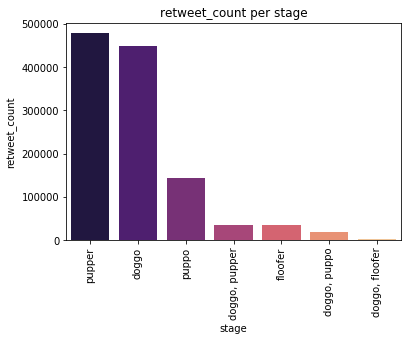

In [67]:
##first Calculate the total number of retweet count for each dog stage then visualize the total number of retweet count for each dog stage
total = master.groupby('stage').agg({'retweet_count': 'sum'}).reset_index()
for i in ['retweet_count']: 
    plt.xticks(rotation = 90)
    ax = sns.barplot(x = 'stage', y = i, data = total.sort_values(i, ascending = False), palette = 'magma')
    ax.set_title('retweet_count per stage')

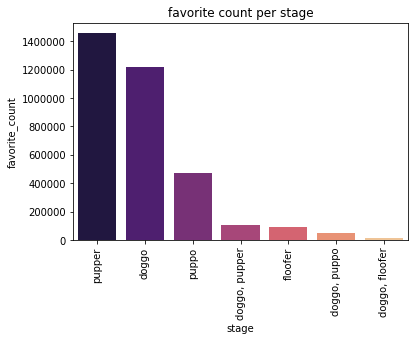

In [68]:
#Calculate the total number of favorite count for each dog stage then visualize the total number of retweet count for each dog stage.
totaz = master.groupby('stage').agg({'favorite_count': 'sum'}).reset_index()
for j in ['favorite_count']: 
    plt.xticks(rotation = 90)
    ax = sns.barplot(x = 'stage', y = j, data = totaz.sort_values(j, ascending = False), palette = 'magma')
    ax.set_title('favorite count per stage')

Text(0.5,1,'The Distribution of Dog Stages')

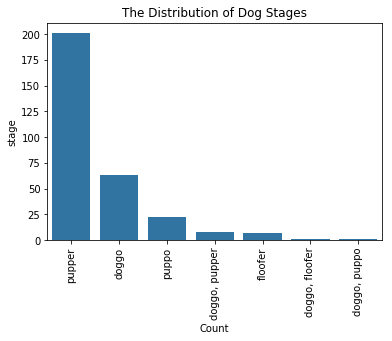

In [69]:
ordy = master['stage'].value_counts().index
color = (0.12156862745098039, 0.4666666666666667, 0.7058823529411765)
sns.countplot(data = master, x ='stage', color = color, order = ordy )
plt.ylabel('stage')
plt.xlabel('Count')
plt.xticks(rotation = 90)
plt.title('The Distribution of Dog Stages')

From the visualization, the most popular dog tweeted is pupper a very small doggo, pupper is the most favorited dog stage and pupper is the most retweeted dog stage and this could be due to the fact that young and unmatured dog are usually considered cuter. Pupper is followed by doggo in the same order.

A vital point to note is that there are huge amount of missing data in the dog stages, thus the distribution may not totally reflect the fact.